In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [52]:
# Загрузка и предобработка данных
# Загружаем данные и удаляем ненужные столбцы
train_data = pd.read_csv('Data/train_final.csv')
test_data = pd.read_csv('Data/test_final.csv')

In [53]:
print("Number of missing values in train dataset:")
print(train_data.isna().sum())
print("Number of missing values in test dataset:")
print(test_data.isna().sum())

Number of missing values in train dataset:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

C:\Users\alexx\AppData\Local\Temp\ipykernel_2708\1928075001.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=y_data, palette='hls')


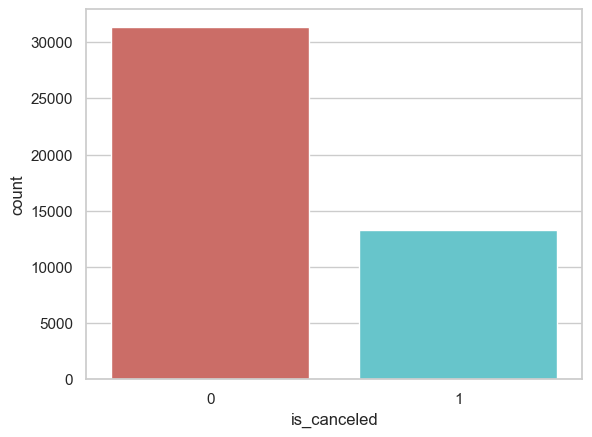

In [58]:
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train_data['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [60]:
train_data.loc[:, train_data.dtypes == object] # Категориальные признаки (строковые)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [ ]:
train_data = train_data.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])
test_data = test_data.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])

In [32]:
# Кодирование категориальных признаков
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_columns = train_data.select_dtypes(include='object').columns

encoded_train_data = onehot_encoder.fit_transform(train_data[categorical_columns])
encoded_test_data = onehot_encoder.transform(test_data[categorical_columns])

encoded_train_df = pd.DataFrame(encoded_train_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

train_data_encoded = train_data.drop(columns=categorical_columns).join(encoded_train_df)
test_data_encoded = test_data.drop(columns=categorical_columns).join(encoded_test_df)

c:\Users\alexx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
# Разделение на признаки и целевую переменную
X = train_data_encoded.drop(columns=['is_canceled']).values
y = train_data_encoded['is_canceled'].values

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Dataset для загрузки данных
class BookingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [35]:
# Создаем DataLoader
train_dataset = BookingDataset(X_train, y_train)
test_dataset = BookingDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [36]:
# Определение архитектуры нейронной сети
class BookingNet(nn.Module):
    def __init__(self, input_size):
        super(BookingNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.sigmoid(self.fc3(x))
        return x

In [40]:
# Инициализация модели, функции потерь и оптимизатора с L2-регуляризацией
net = BookingNet(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)  # L2-регуляризация с weight_decay

epochs = 100
train_losses, val_losses = [], []
early_stopping_tolerance = 15  # Параметр для ранней остановки
best_val_loss = float('inf')
epochs_no_improve = 0

In [41]:
# Обучение модели
for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Оценка на валидационной выборке
    net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = net(inputs).squeeze()
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(test_loader))
    print(f'Epoch {epoch+1}/{epochs} - Training loss: {train_losses[-1]:.4f}, Validation loss: {val_losses[-1]:.4f}')
    
    # Ранняя остановка
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_tolerance:
            print(f"Early stopping on epoch {epoch+1}")
            break

Epoch 1/100 - Training loss: 0.4265, Validation loss: 0.3829
Epoch 2/100 - Training loss: 0.3908, Validation loss: 0.3718
Epoch 3/100 - Training loss: 0.3815, Validation loss: 0.3688
Epoch 4/100 - Training loss: 0.3766, Validation loss: 0.3623
Epoch 5/100 - Training loss: 0.3722, Validation loss: 0.3594
Epoch 6/100 - Training loss: 0.3696, Validation loss: 0.3595
Epoch 7/100 - Training loss: 0.3659, Validation loss: 0.3556
Epoch 8/100 - Training loss: 0.3638, Validation loss: 0.3538
Epoch 9/100 - Training loss: 0.3605, Validation loss: 0.3519
Epoch 10/100 - Training loss: 0.3600, Validation loss: 0.3492
Epoch 11/100 - Training loss: 0.3588, Validation loss: 0.3491
Epoch 12/100 - Training loss: 0.3571, Validation loss: 0.3488
Epoch 13/100 - Training loss: 0.3564, Validation loss: 0.3482
Epoch 14/100 - Training loss: 0.3546, Validation loss: 0.3465
Epoch 15/100 - Training loss: 0.3544, Validation loss: 0.3497
Epoch 16/100 - Training loss: 0.3550, Validation loss: 0.3454
Epoch 17/100 - Tr

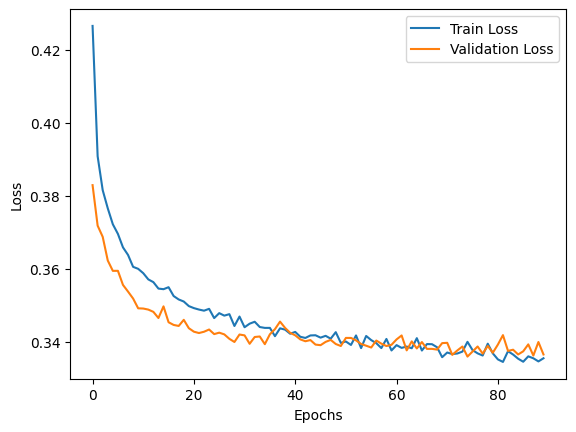

In [42]:
# Визуализация функции потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
X_test_encoded = scaler.transform(test_data_encoded)
X_test_tensor = torch.tensor(X_test_encoded, dtype=torch.float32)

c:\Users\alexx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [48]:
net.eval()

BookingNet(
  (fc1): Linear(in_features=54, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [49]:
with torch.no_grad():
    y_pred_test = net(X_test_tensor).squeeze()  # Прямой проход через сеть
    y_pred_test = y_pred_test.numpy()  # Переводим предсказания в numpy для удобства обработки
    y_pred_test = (y_pred_test >= 0.5).astype(int)  # Бинаризация: классы 0 и 1

In [50]:
y_pred_df = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_df = y_pred_df.reset_index()
y_pred_df.to_csv("result.csv", index=False)